# Bac à sable

## Check header CSV source

In [1]:
import os.path
import pandas as pd
import numpy
from matplotlib import pyplot as plt

### Paramètres 

In [40]:
UPLOAD_FOLDER = 'uploads'
DOWNLOAD_FOLDER = 'downloads'
EXPORT_FILENAME = 'points.scr'
ALLOWED_EXTENSIONS = {'profil': 'csv','lidar': 'csv','dxf2kml': 'dxf', 'vc_lidar':'csv'}
CSV_COLUMS = {'lidar':'"distance","altitude","color_packed","intensity","classification","coords"',
              'profil':'"distance","bathymetry","mns","mnt","x","y"',
              'vc_lidar':'x, y, z, r, g, b, a, classification, intensity, return number, mileage, number of returns, scan angle rank, user data, point source id'}
LIDAR_CLASSIFICATION_IGNORE = [4,5,6]

MNT_ONLY = False
CONVERSION_MODE = 'vc_lidar'
if  CONVERSION_MODE == 'profil':
        SOURCE_FILE = '../static/data_sample/profile.csv'
elif CONVERSION_MODE == 'vc_lidar':
        SOURCE_FILE = '../static/data_sample/VC_profile.csv'
else :
        SOURCE_FILE = '../static/data_sample/LIDAR_profile.csv'



In [5]:
print(type(CSV_COLUMS['profil']))

<class 'str'>


### Fonctions de contrôle

In [14]:
def allowed_file_extension(filename:str, conversion: str) -> bool:
    extension = get_file_extension(filename)
    return True if extension == ALLOWED_EXTENSIONS[conversion] else False

def get_file_name(filepath: str) -> str:
    return filepath.split('/')[-1]

def get_file_extension(filename: str) -> str:
    return filename.rsplit('.', 1)[1].lower()

def get_first_line(file: str) -> list:
    with open(file, encoding='utf-8-sig') as f:
        first_line = f.readline().strip('\n')
    """ first_line = first_line.replace('"', '')
    first_line = first_line.replace(', ', ',')
    return first_line.split(",") """
    return first_line

def check_valid_header_csv(file: str, conversion: str) -> bool:
    src_header = get_first_line(file)
    #request_header = CSV_COLUMS[conversion].split(",")
    request_header = CSV_COLUMS[conversion]
    return True if src_header == request_header else False

# --------- pas valider ou plus ne utiliser ----------

def check_file_extension(file: str, extension: str) -> bool:
    return True if file.rsplit('.', 1)[1].lower() == extension else False

def check_valid_csv_header(file: str, convertion: str) -> bool:
    with open(file, encoding='utf-8-sig') as f:
        first_line = f.readline().strip('\n')

    a = first_line.replace('"', '').split(",")
    b = tuple(CSV_COLUMS[convertion])
    return True if a == b else False

def csv_header_check(df):
    source_colums = get_csv_header(df)
    if source_colums == CSV_COLUMS['profil'] or source_colums == CSV_COLUMS['lidar']:
        return True
    else:
        return False

def get_csv_header(df):
    return df.columns

def get_csv_type_profile(df):
    if csv_header_check(df) :
        source_colums = get_csv_header(df)
        if source_colums == CSV_COLUMS['profil']:
            return 'profile'
        else:
            return 'lidar'
    else:
        return


### Tests des fonctions

#### Nom du fichier et extention

In [15]:
file = SOURCE_FILE

print(get_file_name(SOURCE_FILE))
print(get_file_extension(SOURCE_FILE))
filename = get_file_name(SOURCE_FILE)
print(filename)
print(get_file_extension(filename))

VC_profile.csv
csv
VC_profile.csv
csv


### Retourne l'extension attendu pour chaque type de conversion

In [8]:
print(ALLOWED_EXTENSIONS['profil'])
print(ALLOWED_EXTENSIONS['lidar'])
print(ALLOWED_EXTENSIONS['dxf2kml'])
print(ALLOWED_EXTENSIONS['vc_lidar'])

csv
csv
dxf
csv


### Contrôle si l'extenmsion est celle attendue pour la conversion

In [16]:
print(allowed_file_extension(filename, CONVERSION_MODE))

True


### Contrôle de l'extension selon la conversion

In [17]:
if allowed_file_extension(filename, CONVERSION_MODE):
    print("File type OK")
else:
    print("File type error")

File type OK


### Lire la première line du fichier

In [18]:
print(get_first_line(SOURCE_FILE))
print(type(get_first_line(SOURCE_FILE)))

x, y, z, r, g, b, a, classification, intensity, return number, mileage, number of returns, scan angle rank, user data, point source id
<class 'str'>


### Contrôle si l'en-tête est celle attendue

In [19]:
check_valid_header_csv(file, CONVERSION_MODE)
# print(check_valid_csv_header(file,CSV_COLUMS['profil']))

True

#### Chargement du fichier CSV dans le dataframe

In [46]:
df = pd.read_csv(file)

#### Récupère les noms de colonnes dans une liste

In [47]:
df.columns = df.columns.str.strip()
print(df.columns.to_list())

['x', 'y', 'z', 'r', 'g', 'b', 'a', 'classification', 'intensity', 'return number', 'mileage', 'number of returns', 'scan angle rank', 'user data', 'point source id']


#### Affiche les valeurs attendues pour profil et lidar

In [22]:
print(CSV_COLUMS['lidar'].split(","))
print(type(CSV_COLUMS['lidar'].split(",")))
print(CSV_COLUMS['profil'].split(","))
print(CSV_COLUMS['vc_lidar'].split(","))

['"distance"', '"altitude"', '"color_packed"', '"intensity"', '"classification"', '"coords"']
<class 'list'>
['"distance"', '"bathymetry"', '"mns"', '"mnt"', '"x"', '"y"']
['x', ' y', ' z', ' r', ' g', ' b', ' a', ' classification', ' intensity', ' return number', ' mileage', ' number of returns', ' scan angle rank', ' user data', ' point source id']


In [23]:
df.columns

Index(['x', 'y', 'z', 'r', 'g', 'b', 'a', 'classification', 'intensity',
       'return number', 'mileage', 'number of returns', 'scan angle rank',
       'user data', 'point source id'],
      dtype='object')

### Nom fichier de sortie

In [48]:
print(filename.split(".")[0] + ".scr")

VC_profile.scr


### Créer un dataframe avec les colonnes nécessaires

In [49]:
if CONVERSION_MODE == 'lidar':
    df = df[['distance', 'altitude', 'classification']]
    df.rename(columns={'distance':'x', 'altitude':'y'}, inplace=True)
elif CONVERSION_MODE == 'vc_lidar':
    df = df[['mileage', 'z', 'classification']]
    df.rename(columns={'mileage':'distance', 'z':'altitude'}, inplace=True)

In [26]:
df

,distance,altitude,classification
0,1347.583093,481.396998,18
1,985.577271,542.057002,31
2,405.508844,586.822993,31
3,424.663198,581.620006,2
4,326.868002,616.954997,5
...,...,...,...
70343,1492.380709,457.750038,0
70344,1493.902172,458.418556,0
70345,1501.389867,458.688942,0
70346,1495.280460,459.261818,0


In [27]:
df.columns

Index(['distance', 'altitude', 'classification'], dtype='object')

### Liste les classifications à ignorer

In [104]:
print(LIDAR_CLASSIFICATION_IGNORE)
print(type(LIDAR_CLASSIFICATION_IGNORE))

[4, 5, 6]
<class 'list'>


### Filtre le dataframe sans les classifaction à ignorer

In [50]:
if MNT_ONLY:
    df = df[~df.classification.isin(LIDAR_CLASSIFICATION_IGNORE)]


### Créer des groupes par classification

In [51]:
gb = df.groupby('classification')

In [ ]:
print(type(pd.unique(df['classification'])[0]))

for g in gb:
    print(g[0])

In [57]:
for g in gb:
    # write line to create layer named by classsification (g[0] = list of unique classification)
    print(("_-layer E " + str(g[0]) + " \r"))
    # write line to create a point for each row
    for index, row in g[1].iterrows() :
        x = round(row['distance'],3)
        y = round(row['altitude'],3)
        print('point ' + str(x) + ',' + str(y) + "\r")

_-layer E 0 
point 1517.495,456.741
point 1521.619,452.256
point 1513.104,455.834
point 1515.548,455.876
point 1499.195,456.103
point 1503.012,456.737
point 1505.791,450.825
point 1505.099,458.43
point 1520.352,455.762
point 1514.354,457.089
point 1507.681,457.664
point 1511.384,457.453
point 1511.52,454.196
point 1495.133,456.523
point 1496.02,457.299
point 1492.733,457.609
point 1519.809,450.513
point 1516.561,450.775
point 1509.924,450.892
point 1521.617,451.817
point 1512.326,452.55
point 1505.334,452.836
point 1512.717,454.892
point 1501.24,455.636
point 1505.384,457.998
point 1509.021,458.123
point 1498.988,458.433
point 1501.849,458.877
point 1495.176,459.917
point 1516.386,450.634
point 1511.618,450.785
point 1505.368,450.988
point 1513.206,450.866
point 1508.439,450.846
point 1518.86,452.375
point 1520.521,453.228
point 1518.014,453.38
point 1518.753,453.496
point 1513.424,453.905
point 1509.469,454.805
point 1509.962,455.082
point 1504.49,455.329
point 1510.845,455.288
point 

---


# Tests graphes

In [138]:
df

,x,y,classification
0,0.25,458.153,31
1,0.25,458.154,31
2,0.26,458.041,2
3,0.43,458.123,2
4,1.92,458.078,2
...,...,...,...
2257,418.04,430.447,4
2258,418.16,431.824,4
2259,418.42,432.178,4
2260,418.96,429.937,4


In [52]:
plt.style.use('default')
#plt.style.available

In [53]:
x = df['distance']
y = df['altitude']
colors = df['classification']

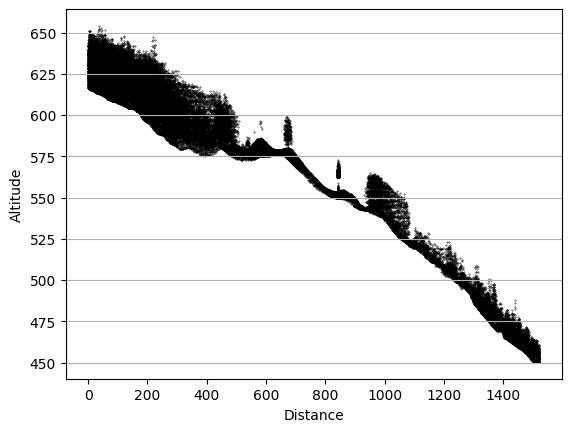

In [54]:
ax = plt.axes()        
ax.yaxis.grid() 
plt.ylabel('Altitude')
plt.xlabel('Distance')
#plt.scatter(x,y, c=colors, cmap='viridis', s=0.1)
plt.scatter(x,y, c='k', s=0.1)
#cbar = plt.colorbar()
#cbar.set_label('Calssificaton')

### Colorise selon classification EXPERIMENTAL

In [32]:
file_json = '../static/classification_lidar_cloud_points.json'
dfc = pd.read_json(file_json)

In [36]:
print(dfc)
print(dfc.columns)

    classification                label                       label_fr  \
0                0     never classified                  Jamais classé   
1                1         unclassified                  Non attribuée   
2                2               ground                            Sol   
3                3       low vegetation               Végétation basse   
4                4    medium vegetation             Moyenne végétation   
5                5      high vegetation               Haute végétation   
6                6                roofs               Bâtiment (toits)   
7                7     low point(noise)                      Point bas   
8                9                water                            Eau   
9               14                wires  Conducteur métallique (Phase)   
10              15  transmission towers           Tour de transmission   
11              17      Tablier de pont                            NaN   
12              18           high nois

In [37]:
dfc = dfc.rename(columns={'classification_code': 'classification'})

In [38]:
dfc.columns

Index(['classification', 'label', 'label_fr', 'color'], dtype='object')

In [39]:
df.columns

Index(['distance', 'altitude', 'color_packed', 'intensity', 'classification',
       'coords'],
      dtype='object')

In [40]:
dff = pd.merge(df, dfc[['classification', 'color']], how='left', on='classification')

In [41]:
dff

,distance,altitude,color_packed,intensity,classification,coords,color
0,0.25,458.153,191 209 196,183,31,2552913.044 1197449.9989999998,"rgb(128,51,204)"
1,0.25,458.154,191 209 196,183,31,2552913.044 1197449.999,"rgb(128,51,204)"
2,0.26,458.041,190 209 199,96,2,2552910.958 1197447.712,"rgb(153,76,51)"
3,0.43,458.123,193 211 201,146,2,2552912.469 1197449.104,"rgb(153,76,51)"
4,1.92,458.078,184 203 192,137,2,2552912.924 1197447.4049999998,"rgb(153,76,51)"
...,...,...,...,...,...,...,...
1108,415.45,429.283,84 105 111,63,3,2553083.421 1197078,"rgb(0,255,0)"
1109,415.55,429.167,93 117 124,17,18,2553083.808 1197078.0329999998,"rgb(25,255,76)"
1110,415.55,429.168,93 117 124,17,18,2553083.808 1197078.033,"rgb(25,255,76)"
1111,416.92,429.173,76 101 117,8,9,2553083.498 1197076.468,"rgb(0,0,255)"


In [ ]:
plt.scatter(x, y, c = z , cmap = "magma")

In [ ]:
ax = plt.axes()        
ax.yaxis.grid() 
plt.ylabel('Altitude')
plt.xlabel('Distance')
plt.scatter(x,y, c=colors, cmap='viridis', s=0.1)
cbar = plt.colorbar()
cbar.set_label('Calssificaton')

## Section ligne de profil terrain

In [53]:
file = SOURCE_FILE
filename = get_file_name(SOURCE_FILE)

### Contrôle du fichier source

In [59]:

print('File name : ', get_file_name(SOURCE_FILE))
print('File extension : ',get_file_extension(SOURCE_FILE))
print('Is extenstion OK ? ', allowed_file_extension(filename, CONVERSION_MODE))
print('is header OK ? ', check_valid_header_csv(file, CONVERSION_MODE))

File name :  profile.csv
File extension :  csv
Is extenstion OK ?  True
is header OK ?  True


### Load data

In [60]:
df = pd.read_csv(file)

In [61]:
df

,distance,bathymetry,mns,mnt,x,y
0,0.0,0,458.1,458.1,2.552912e+06,1.197449e+06
1,4.2,0,458.2,458.1,2.552915e+06,1.197446e+06
2,8.4,0,458.2,458.2,2.552918e+06,1.197443e+06
3,12.6,0,458.2,458.2,2.552921e+06,1.197440e+06
4,16.9,0,458.3,458.3,2.552924e+06,1.197438e+06
...,...,...,...,...,...,...
96,403.4,428,429.3,429.3,2.553077e+06,1.197089e+06
97,407.6,428,429.3,429.2,2.553079e+06,1.197085e+06
98,411.8,428,429.3,429.3,2.553080e+06,1.197081e+06
99,416.0,428,429.3,429.3,2.553082e+06,1.197077e+06


In [ ]:
x1 = df['distance']
y1 = df['mnt']
if not MNT_ONLY:
    x2 = df['distance']
    y2 = df['mns']

### Set graphe and plot

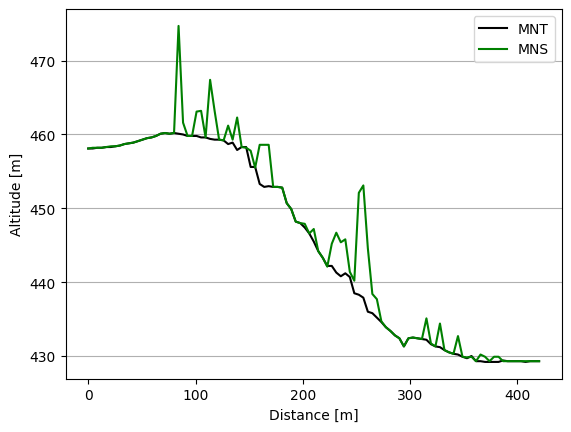

In [93]:
# Set graph style
plt.style.use('default')
# Set grid
ax = plt.axes()        
ax.yaxis.grid()
# Set axis labels
plt.ylabel('Altitude [m]')
plt.xlabel('Distance [m]')

#plt.scatter(x,y, c='k', s=0.1)
plt.plot(x1, y1, c='k', label = "MNT")
if not MNT_ONLY:
    plt.plot(x2, y2, c='g', label = "MNS")

plt.legend()


## Script

### Création des lignes de profil

In [120]:
print("_-layer E _AJS_100_E_profil_mnt_T\r")
print("_pline\r")
for index, row in df.iterrows() :
    print(str(row['distance']) + ',' + str(row['mnt']))
print("\r")
if not MNT_ONLY:
    print("_-layer E _AJS_100_E_profil_mms_T\r")
    print("_pline\r")
    for index, row in df.iterrows() :
        print(str(row['distance']) + ',' + str(row['mns']))
    print("\r")

_-layer E _AJS_100_E_profil_mnt_T
_pline
0.0,458.1
4.2,458.1
8.4,458.2
12.6,458.2
16.9,458.3
21.1,458.3
25.3,458.4
29.5,458.5
33.7,458.7
37.9,458.8
42.1,458.9
46.4,459.1
50.6,459.3
54.8,459.5
59.0,459.6
63.2,459.8
67.4,460.1
71.6,460.2
75.8,460.1
80.0,460.2
84.2,460.1
88.4,460.0
92.6,459.8
96.8,459.8
101.0,459.8
105.2,459.6
109.4,459.6
113.6,459.4
117.8,459.3
122.0,459.3
126.2,459.2
130.4,458.7
134.6,458.9
138.8,457.9
143.0,458.3
147.2,458.3
151.4,455.6
155.6,455.6
159.8,453.3
164.0,452.9
168.2,453.0
172.4,452.9
176.6,452.9
180.8,452.8
185.0,450.7
189.2,449.9
193.4,448.2
197.6,448.0
201.8,447.4
206.0,446.6
210.2,445.5
214.4,444.2
218.6,443.3
222.8,442.2
227.0,442.2
231.2,441.3
235.4,440.8
239.6,441.2
243.8,440.7
248.0,438.5
252.2,438.3
256.4,437.9
260.6,436.0
264.8,435.8
269.0,435.2
273.2,434.6
277.4,433.9
281.6,433.4
285.8,432.8
290.0,432.4
294.2,431.3
298.4,432.4
302.6,432.5
306.8,432.4
311.0,432.3
315.2,432.2
319.4,431.6
323.6,431.3
327.8,431.2
332.0,430.8
336.2,430.5
340.4,430.3
34